<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [4]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [22]:
from scipy.integrate import trapz, simps


class Quad_:
    def __init__(self, function, a, b, N):
        self.function = function  
        self.a = a  
        self.b = b  
        self.N = N
        self.x = np.linspace(a, b, N+1)
        self.y = function(self.x)

    def midpoint(self):
        h = (self.b + self.a) / self.N
        result = 0.0
        for i in range(self.N):
            xi = self.a + (i + 0.5) * h
            result += self.function(xi)
        result *= h
        return result

    def trapezoidal(self):
        result = trapz(self.y, self.x)
        return result 

    def simpsons(self):
        result = simps(self.y, self.x)
        return result


def sample_function(x):
    return x**3

a = 0
b = 2
N = 4

quad = Quad_(sample_function, a, b, N)
midpoint_result = quad.midpoint()
trapezoidal_result = quad.trapezoidal()
simpsons_result = quad.simpsons()

print(f"Midpoint: {midpoint_result}")
print(f"Trapezoidal: {trapezoidal_result}")
print(f"Simpson's: {simpsons_result}")




Midpoint: 3.875
Trapezoidal: 4.25
Simpson's: 4.0


## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [6]:
# Add the following to the class in part A). 
def mid_quad(self):
    h = (self.b + self.a) / self.N
    result = 0.0
    for i in range(self.N):
        xi = self.a + (i + 0.5) * h
        result += self.function(xi)
    result *= h
    return result
    
def trapz_quad(self):
    h = (self.b + self.a) / self.N
    result = 0.5 * (self.function(self.a) + self.function(self.b))
    for i in range(1, self.N):
        xi = self.a + i * h
        result += self.function(xi)
    result *= h
    return result

def simpson_quad(self):
    h = (self.b + self.a) / self.N
    result = self.function(self.a) + self.function(self.b)
    for i in range(1, self.N, 2):
        xi = self.a + i * h
        result += 4 * self.function(xi)
    for i in range(2, self.N - 1, 2):
        xi = self.a + i * h
        result += 2 * self.function(xi)
    result *= h / 3
    return result



<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>


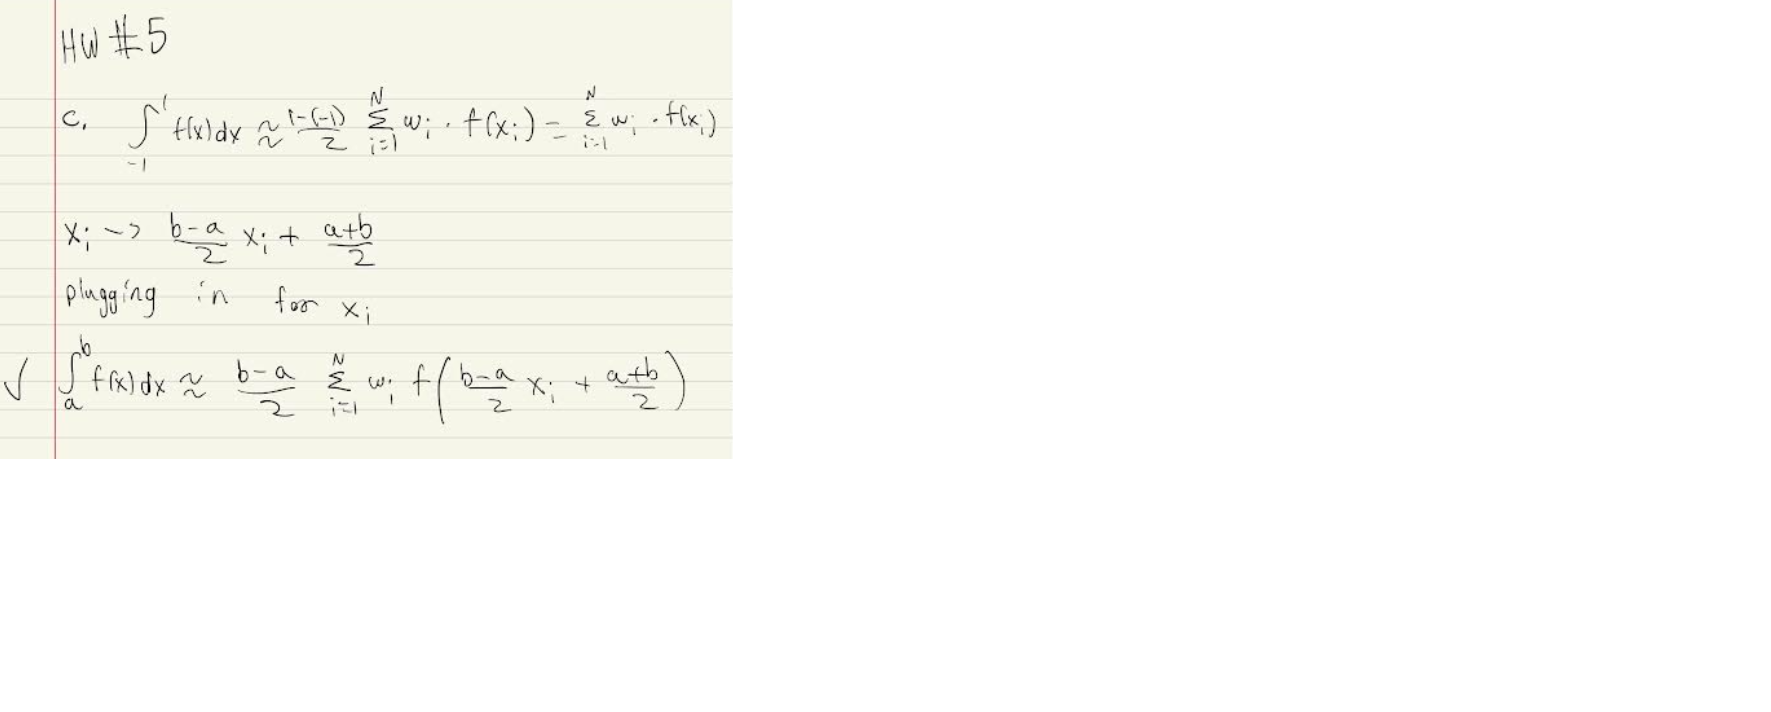

<br>
'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

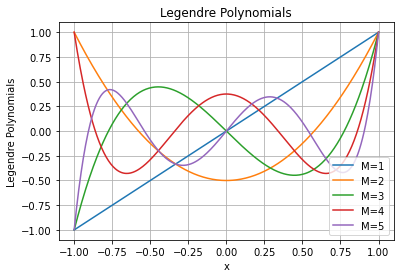

In [7]:
class Gauss_Quad_(Quad_):
    def __init__(self, function, a, b, N, order):
        super().__init__(function, a, b,  N)
        self.order = order
        '''The class take an additional input, called order. 
        make sure you look into super(). '''
    def legendre_poly(self,M, x):
        if M == 0:
            return 1.0
        elif M == 1:
            return x
        else:
            P_prev = 1.0
            P = x
            for n in range(2, M + 1):
                P_next = ((2 * n - 1) * x * P - (n - 1) * P_prev) / n
                P_prev, P = P, P_next
            return P

    def legendre_polynomial_derivative(self, M, x):
            if M == 0:
                return 0.0
            else:
                P = self.legendre_polynomial(M, x)
                dP = M * (x * P - self.legendre_poly(M-1, x)) / (x**2 - 1)
                return dP 
    def plot_legendre_polynomials(self, M_values):
        x_values = np.linspace(self.a, self.b, 400)
        
        for M in M_values:
            legendre_values = [self.legendre_poly(M, x) for x in x_values]
            plt.plot(x_values, legendre_values, label=f'M={M}')

        plt.xlabel('x')
        plt.ylabel('Legendre Polynomials')
        plt.title('Legendre Polynomials')
        plt.legend()
        plt.grid(True)
        plt.show()
        
def f(x):
    return x**2

gauss_quad = Gauss_Quad_(f, -1, 1, 4, 2)  

M_values = [1, 2, 3, 4, 5]

gauss_quad.plot_legendre_polynomials(M_values)

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [8]:
# Add the following to the class in part D). 

class Gauss_Quad_(Quad_):
    def __init__(self, function, a, b, N, order):
        super().__init__(function, a, b,  N)
        self.order = order
        '''The class take an additional input, called order. 
        make sure you look into super(). '''
    def legendre_poly(self,M, x):
        if M == 0:
            return 1.0
        elif M == 1:
            return x
        else:
            P_prev = 1.0
            P = x
            for n in range(2, M + 1):
                P_next = ((2 * n - 1) * x * P - (n - 1) * P_prev) / n
                P_prev, P = P, P_next
            return P

    def legendre_polynomial_derivative(self, M, x):
            if M == 0:
                return 0.0
            else:
                P = self.legendre_poly(M, x)
                dP = M * (x * P - self.legendre_poly(M-1, x)) / (x**2 - 1)
                return dP 
    def newton_method_root(self, M):
        x_values = []
        w_values = []

        for i in range(1, M + 1):
            x_n = np.cos(np.pi * (i - 0.25) / (M + 0.5))
            while True:
                P_M = self.legendre_poly(M, x_n)
                P_M_derivative = self.legendre_polynomial_derivative(M, x_n)
                x_next = x_n - P_M / P_M_derivative
                if abs(x_next - x_n) < 1e-10:
                    break
                x_n = x_next

            w_i = 2 / ((1 - x_n**2) * P_M_derivative**2)
            x_values.append(x_n)
            w_values.append(w_i)

        return x_values, w_values

def f(x):
    return x**2

gauss_quad = Gauss_Quad_(f, -1, 1, 4, 2) 


M_values = [1, 2, 3, 4, 5]

results = {}
for M in M_values:
    x_values, w_values = gauss_quad.newton_method_root(M)
    results[M] = (x_values, w_values)

for M, (x_values, w_values) in results.items():
    print(f'M={M}: x_values = {x_values}, w_values = {w_values}')
    
with open('newton_method_root_results.txt', 'w') as file:
    for M, (x_values, w_values) in results.items():
        file.write(f'M={M}: x_values = {x_values}, w_values = {w_values}\n')

print("Results saved to 'newton_method_results.txt'")


M=1: x_values = [6.123233995736766e-17], w_values = [2.0]
M=2: x_values = [0.5773502691896257, -0.5773502691896257], w_values = [1.0000000000000004, 1.0000000000000004]
M=3: x_values = [0.7745966692414841, 6.123233995736766e-17, -0.7745966692414841], w_values = [0.5555555555555541, 0.8888888888888888, 0.5555555555555541]
M=4: x_values = [0.8611363115940539, 0.33998104358576997, -0.33998104358576997, -0.8611363115940539], w_values = [0.3478548451374507, 0.6521451548620882, 0.6521451548620882, 0.3478548451374507]
M=5: x_values = [0.9061798459386655, 0.538469310114685, 2.83276944882399e-16, -0.538469310114685, -0.9061798459386655], w_values = [0.23692688505618542, 0.47862867049283164, 0.5688888888888889, 0.47862867049283164, 0.23692688505618542]
Results saved to 'newton_method_results.txt'


## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [9]:
# Add the following to the class in part D). 
from scipy.special import roots_legendre 
class Gauss_Quad_(Quad_):
    def __init__(self, function, a, b, N, order):
        super().__init__(function, a, b,  N)
        self.order = order
        '''The class take an additional input, called order. 
        make sure you look into super(). '''
    def legendre_poly(self,M, x):
        if M == 0:
            return 1.0
        elif M == 1:
            return x
        else:
            P_prev = 1.0
            P = x
            for n in range(2, M + 1):
                P_next = ((2 * n - 1) * x * P - (n - 1) * P_prev) / n
                P_prev, P = P, P_next
            return P

    def legendre_polynomial_derivative(self, M, x):
            if M == 0:
                return 0.0
            else:
                P = self.legendre_poly(M, x)
                dP = M * (x * P - self.legendre_poly(M-1, x)) / (x**2 - 1)
                return dP 


    def scipy_method_root(self,M):
        x_values, w_values = roots_legendre(M)
        return x_values, w_values

def f(x):
    return x**2

gauss_quad = Gauss_Quad_(f, -1, 1, 4, 2) 


M_values = [1, 2, 3, 4, 5]

results = {}
for M in M_values:
    x_values, w_values = gauss_quad.scipy_method_root(M)
    results[M] = (x_values, w_values)

for M, (x_values, w_values) in results.items():
    print(f'M={M}: x_values = {x_values}, w_values = {w_values}')
    
with open('scipy_method_results.txt', 'w') as file:
    for M, (x_values, w_values) in results.items():
        file.write(f'M={M}: x_values = {x_values}, w_values = {w_values}\n')

print("Results saved to 'scipy_method_results.txt'")



M=1: x_values = [0.], w_values = [2.]
M=2: x_values = [-0.57735027  0.57735027], w_values = [1. 1.]
M=3: x_values = [-0.77459667  0.          0.77459667], w_values = [0.55555556 0.88888889 0.55555556]
M=4: x_values = [-0.86113631 -0.33998104  0.33998104  0.86113631], w_values = [0.34785485 0.65214515 0.65214515 0.34785485]
M=5: x_values = [-0.90617985 -0.53846931  0.          0.53846931  0.90617985], w_values = [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
Results saved to 'scipy_method_results.txt'


## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [11]:
# Add the following to the class in part D).

from scipy.special import roots_legendre

class Gauss_Quad(Quad_):
    def __init__(self, function, a, b, N, order):
        super().__init__(function, a, b, N)
        self.order = order

    def legendre_poly(self, M, x):
        if M == 0:
            return 1.0
        elif M == 1:
            return x
        else:
            P_prev = 1.0
            P = x
            for n in range(2, M + 1):
                P_next = ((2 * n - 1) * x * P - (n - 1) * P_prev) / n
                P_prev, P = P, P_next
            return P

    def legendre_polynomial_derivative(self, M, x):
        if M == 0:
            return 0.0
        else:
            P = self.legendre_poly(M, x)
            dP = M * (x * P - self.legendre_poly(M-1, x)) / (x**2 - 1)
            return dP 

    def scipy_method_root(self, M):
        x_values, w_values = roots_legendre(M)
        return x_values, w_values

    def gauss_quad(self, M):
        x_values, w_values = self.scipy_method_root(M)
        result = 0
        for i in range(M):
            result += w_values[i] * self.function(0.5 * (self.b - self.a) * x_values[i] + 0.5 * (self.b + self.a))
        result *= 0.5 * (self.b - self.a)
        return result


def f(x):
    return x**2

gauss_quad_instance = Gauss_Quad(f, -1, 1, 4, 2)  

M_values = [1, 2, 3, 4]

for M_val in M_values:
    quadrature_result = gauss_quad_instance.gauss_quad(M_val)
    print(f'Gauss-Legendre Quadrature result for M={M_val}: {quadrature_result}')




Gauss-Legendre Quadrature result for M=1: 0.0
Gauss-Legendre Quadrature result for M=2: 0.6666666666666666
Gauss-Legendre Quadrature result for M=3: 0.666666666666667
Gauss-Legendre Quadrature result for M=4: 0.6666666666666666


<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





'--------------------Write your code above this line------------------------------'

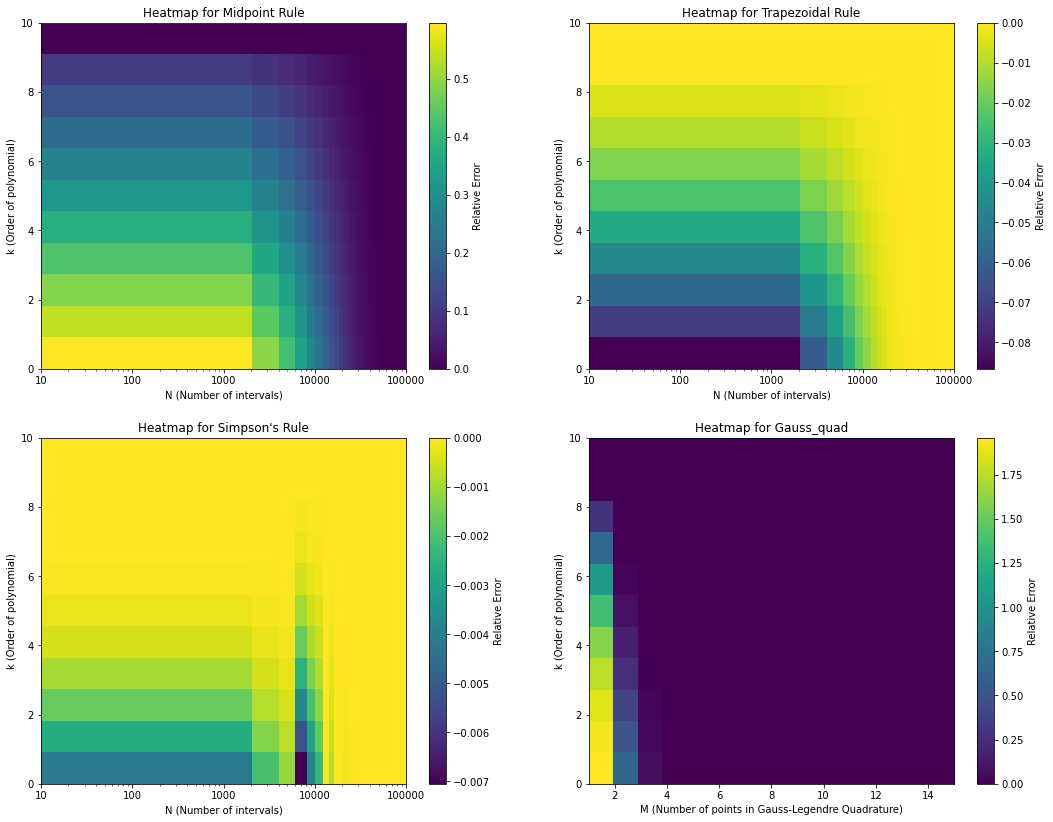

In [17]:


'''--------------------Write your code below this line------------------------------'''


class Quad_:
    def __init__(self, function, a, b, N):
        self.function = function  
        self.a = a  
        self.b = b  
        self.N = N
        self.x = np.linspace(a, b, N+1)
        self.y = function(self.x)

    def midpoint(self):
        h = (self.b - self.a) / self.N
        result = np.sum(self.y[:-1]) * h
        return result

    def trap(self):
        result = trapz(self.y, self.x)
        return result 

    def simpsons(self):
        result = simps(self.y, self.x)
        return result

    def gauss_quad(self, M):
        x_values, w_values = roots_legendre(M)
        result = 0
        for i in range(M):
            result += w_values[i] * self.function(0.5 * (self.b - self.a) * x_values[i] + 0.5 * (self.b + self.a))
        result *= 0.5 * (self.b - self.a)
        return result

    
def kth_poly(x, k):
    return x**k

def true(a, b, k):
    return 1/(k+1) * (b**(k + 1) - a**(k+1))

def error(true_value, approx_value):
    return 2 * (true_value - approx_value)/(true_value + approx_value)

k_values = np.arange(0, 11)
N_values = np.logspace(1, 5, num=50, dtype=int)
M_values = np.arange(1, 16)

error_mid = np.zeros((len(k_values), len(N_values)))
error_trap = np.zeros((len(k_values), len(N_values)))
error_simp = np.zeros((len(k_values), len(N_values)))
error_gauss_quad = np.zeros((len(k_values), len(M_values)))

for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        function_integrate = lambda x: kth_poly(x, k)
        quadrature = Quad_(function_integrate, 0, 1, N)
        
        approx_mid = quadrature.midpoint()
        true_value = true(0, 1, k)
        
        error_mid[i, j] = error(true_value, approx_mid)
        
        approx_trap = quadrature.trap()
        error_trap[i, j] = error(true_value, approx_trap)
        
        approx_simp = quadrature.simpsons()
        error_simp[i, j] = error(true_value, approx_simp)
        
    for j, M in enumerate(M_values):
        approx_gauss_quad = quadrature.gauss_quad(M)
        error_gauss_quad[i, j] = error(true_value, approx_gauss_quad)


plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
plt.imshow(error_mid, extent=[10, 10**5, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Midpoint Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 2)
plt.imshow(error_trap, extent=[10, 10**5, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Trapezoidal Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 3)
plt.imshow(error_simp, extent=[10, 10**5, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title("Heatmap for Simpson's Rule")
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 4)
plt.imshow(error_gauss_quad, extent=[1, 15, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('M (Number of points in Gauss-Legendre Quadrature)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Gauss_quad')
plt




'''--------------------Write your code above this line------------------------------'''

## H) Fermi–Dirac


C:\Users\Brian\AppData\Local\Temp/ipykernel_16960/4011026115.py:37: RuntimeWarning: divide by zero encountered in long_scalars
  return 1/k * (np.log(np.exp(k*b) + 1) - np.log(np.exp(k*a) + 1))
C:\Users\Brian\AppData\Local\Temp/ipykernel_16960/4011026115.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return 1/k * (np.log(np.exp(k*b) + 1) - np.log(np.exp(k*a) + 1))


'--------------------Write your code above this line------------------------------'

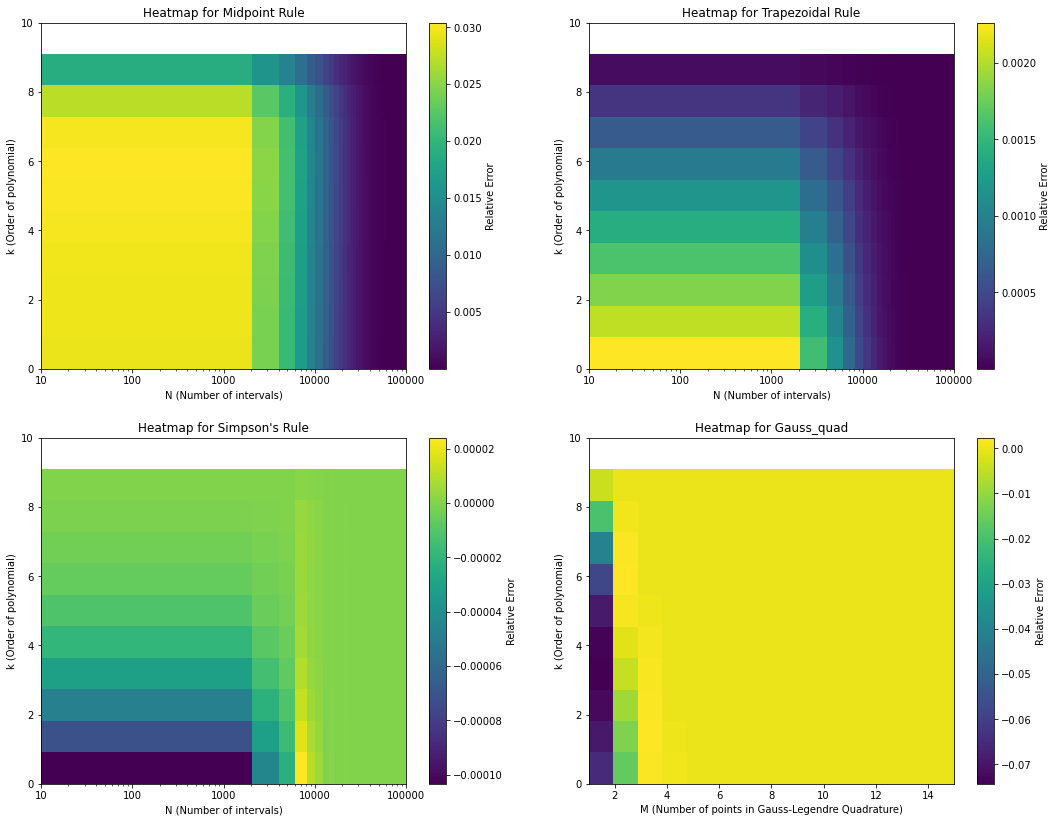

In [19]:


'''--------------------Write your code below this line------------------------------'''
class Quad_:
    def __init__(self, function, a, b, N):
        self.function = function  
        self.a = a  
        self.b = b  
        self.N = N
        self.x = np.linspace(a, b, N+1)
        self.y = function(self.x)

    def midpoint(self):
        h = (self.b - self.a) / self.N
        result = np.sum(self.y[:-1]) * h
        return result

    def trap(self):
        result = trapz(self.y, self.x)
        return result 

    def simpsons(self):
        result = simps(self.y, self.x)
        return result

    def gauss_quad(self, M):
        x_values, w_values = roots_legendre(M)
        result = 0
        for i in range(M):
            result += w_values[i] * self.function(0.5 * (self.b - self.a) * x_values[i] + 0.5 * (self.b + self.a))
        result *= 0.5 * (self.b - self.a)
        return result

    
def kth_poly(x, k):
    return 1/(1+ np.exp(-k*x))

def true(a, b, k):
    return 1/k * (np.log(np.exp(k*b) + 1) - np.log(np.exp(k*a) + 1))

def error(true_value, approx_value):
    return 2 * (true_value - approx_value)/(true_value + approx_value)

k_values = np.arange(0, 11)
N_values = np.logspace(1, 5, num=50, dtype=int)
M_values = np.arange(1, 16)

error_mid = np.zeros((len(k_values), len(N_values)))
error_trap = np.zeros((len(k_values), len(N_values)))
error_simp = np.zeros((len(k_values), len(N_values)))
error_gauss_quad = np.zeros((len(k_values), len(M_values)))

for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        function_integrate = lambda x: kth_poly(x, k)
        quadrature = Quad_(function_integrate, 0, 1, N)
        
        approx_mid = quadrature.midpoint()
        true_value = true(0, 1, k)
        
        error_mid[i, j] = error(true_value, approx_mid)
        
        approx_trap = quadrature.trap()
        error_trap[i, j] = error(true_value, approx_trap)
        
        approx_simp = quadrature.simpsons()
        error_simp[i, j] = error(true_value, approx_simp)
        
    for j, M in enumerate(M_values):
        approx_gauss_quad = quadrature.gauss_quad(M)
        error_gauss_quad[i, j] = error(true_value, approx_gauss_quad)


plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
plt.imshow(error_mid, extent=[10, 10**5, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Midpoint Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 2)
plt.imshow(error_trap, extent=[10, 10**5, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Trapezoidal Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 3)
plt.imshow(error_simp, extent=[10, 10**5, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title("Heatmap for Simpson's Rule")
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 4)
plt.imshow(error_gauss_quad, extent=[1, 15, 0, 10], aspect='auto', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('M (Number of points in Gauss-Legendre Quadrature)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Gauss_quad')
plt


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [1]:
import numpy as np

def V(x):
    'Potential'
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    return 1 / (V(a) - V(x))**0.5



## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [2]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad

def calc_time_period(a, N):
    result, _ = fixed_quad(timep, 0, a, n=N, args=(a,))
    T = (8 **0.5) * result
    return T

def est_error(a, N):
    T_N = calc_time_period(a, N)
    T_2N = calc_time_period(a, 2 * N)
    error = abs(T_2N - T_N)
    return error


N_values = [10, 20, 30]

a = 2

threshold = 1e-4

errors = [est_error(a, N) for N in N_values]

T_values = [calc_time_period(a, N) for N in N_values]

for N, T in zip(N_values, T_values):
    print(f"N = {N}, Time period T = {T}")
    
for N, error in zip(N_values, errors):
    print(f"N = {N}, Error = {error}")

while error >= threshold:
    N *= 2
    error = est_error(a, N)

print(f"N = {N}, Error = {error} (less than {threshold})")


'''--------------------Write your code above this line------------------------------'''

N = 10, Time period T = 1.7954772678567574
N = 20, Time period T = 1.8240470420216144
N = 30, Time period T = 1.8338902920242026
N = 10, Error = 0.028569774164856954
N = 20, Error = 0.01482654491339419
N = 30, Error = 0.010008204850605606
N = 3840, Error = 8.014971862779774e-05 (less than 0.0001)


'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [3]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad
def calc_time_period_with_quad(a, N):
    result , error = quad(timep, 0, a, args=(a,), points=np.linspace(0, a, N))
    T = (8 **0.5) * result
    return T, error 
a = 2
N_values = [10, 20, 30, 40, 50]

results = []
for N in N_values:
    T, error = calc_time_period_with_quad(a, N)
    results.append((N, T, error))

for N, T, error in results:
    print(f"N = {N}, Time period T = {T}, Error estimate = {error}")
'''--------------------Write your code above this line------------------------------'''

N = 10, Time period T = 1.8540746773015295, Error estimate = 5.370148770111882e-13
N = 20, Time period T = 1.8540746773022694, Error estimate = 5.5860164271948065e-09
N = 30, Time period T = 1.8540746773020647, Error estimate = 1.1340411387728011e-08
N = 40, Time period T = 1.854074677303462, Error estimate = 7.271367064021206e-09
N = 50, Time period T = 1.8517550881251779, Error estimate = 0.024026535835756212


C:\Users\Brian\AppData\Local\Temp/ipykernel_27184/1190920984.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result , error = quad(timep, 0, a, args=(a,), points=np.linspace(0, a, N))


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [4]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg
from scipy import integrate

divmax = 10

def calc_time_period_rom(a, n):
    result = integrate.romberg(timep, 0, a - 1e-5, args=(a,), divmax=divmax)
    T = (8**0.5) * result
    return T
a = 2

N_values = [10, 20, 30]

results = []
for N in N_values:
    T = calc_time_period_rom(a, N)
    results.append((N, T))

for N, T in results:
    print(f"N = {N}, Time period T = {T}")

'''--------------------Write your code above this line------------------------------'''

N = 10, Time period T = 1.9211550393555297
N = 20, Time period T = 1.9211550393555297
N = 30, Time period T = 1.9211550393555297


C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.934461e-02
  warnings.warn(


'--------------------Write your code above this line------------------------------'

It gives error or nan because when going through the function a divison by zero occurs when having the bounds as 0 to 2, so a change to them needs to be made so that it does not occur along with using args and divmax.

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [5]:


'''--------------------Write your code below this line------------------------------'''

    

def calc_time_period_rom(a, n, divmax=10):
    result = integrate.romberg(timep, 0, a - 1e-5, args=(a,), divmax=divmax)
    
    # Calculate the estimated error
    if divmax > 1:
        result_previous = romberg(timep, 0, a - 1e-5, args=(a,), divmax=divmax - 1)
        error_estimate = abs(result - result_previous)
    else:
        error_estimate = None
    return T, error_estimate


a = 2

N_values = [10, 20, 30]


results = []
for N in N_values:
    T, error = calc_time_period_rom(a, N)
    results.append((N, T, error))

for N, T, error in results:
    print(f"N = {N}, Time period T = {T}, Error estimate = {error}")
'''--------------------Write your code above this line------------------------------'''

N = 10, Time period T = 1.9211550393555297, Error estimate = 0.02934461192404514
N = 20, Time period T = 1.9211550393555297, Error estimate = 0.02934461192404514
N = 30, Time period T = 1.9211550393555297, Error estimate = 0.02934461192404514


C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 6.096685e-02
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [6]:


'''--------------------Write your code below this line------------------------------'''
def calc_time_period_rom(a, n, divmax=15):
    result = integrate.romberg(timep, 0, a - 1e-5, args=(a,), divmax=divmax)
    
    # Calculate the estimated error
    if divmax > 1:
        result_previous = romberg(timep, 0, a - 1e-5, args=(a,), divmax=divmax - 1)
        error_estimate = abs(result - result_previous)
    else:
        error_estimate = None
    return T, error_estimate


a = 2

N_values = [10, 20, 30]


results = []
for N in N_values:
    T, error = calc_time_period_rom(a, N)
    results.append((N, T, error))

for N, T, error in results:
    print(f"N = {N}, Time period T = {T}, Error estimate = {error}")

'''--------------------Write your code above this line------------------------------'''

C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (15) exceeded. Latest difference = 4.291932e-04
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (14) exceeded. Latest difference = 1.160667e-03
  warnings.warn(


N = 10, Time period T = 1.9211550393555297, Error estimate = 0.00042919324526080604
N = 20, Time period T = 1.9211550393555297, Error estimate = 0.00042919324526080604
N = 30, Time period T = 1.9211550393555297, Error estimate = 0.00042919324526080604


'--------------------Write your code above this line------------------------------'

The accuracy changes by 2 decimal places showing that divmax= 15 is more accurate.

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

C:\Users\Brian\AppData\Local\Temp/ipykernel_27184/1529592983.py:12: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(denominator)
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = nan
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.501597e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 2.075886e-01
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.343261e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib

C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 9.741938e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.495663e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 9.624269e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.447553e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 9.510933e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.401027e-02
  warnings.w

C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 6.869397e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.268632e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 6.829288e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.250784e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (9) exceeded. Latest difference = 6.789894e-02
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.233237e-02
  warnings.w

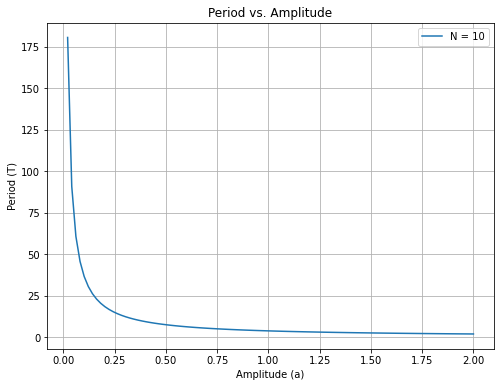

'--------------------Write your code above this line------------------------------'

In [10]:


'''--------------------Write your code below this line------------------------------'''

import matplotlib.pyplot as plt

def calc_time_period_rom(a, n, divmax=10):
    result = romberg(timep, 0, a - 1e-5, args=(a,), divmax=divmax)
    
    if divmax > 1:
        result_previous = romberg(timep, 0, a - 1e-5, args=(a,), divmax=divmax - 1)
        error_estimate = abs(result - result_previous)
    else:
        error_estimate = None
    
    T = (8**0.5) * result
    return T, error_estimate

a_values = np.linspace(0, 2, 100)


N = 10 
periods = [calc_time_period_rom(a, N)[0] for a in a_values]

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(a_values, periods, label=f'N = {N}')
plt.xlabel('Amplitude (a)')
plt.ylabel('Period (T)')
plt.title('Period vs. Amplitude')
plt.legend()
plt.grid(True)
plt.show()



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [62]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

pre = (2 * pi * k**4)/(c**3 * h**3)

import numpy as np
from scipy.integrate import quad

def blackbody_var(z):
    x = z/(1-z)
    return x**3 / (np.exp(x) - 1) 
    

## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [63]:


'''--------------------Write your code below this line------------------------------'''
pre = (2 * pi * k**4)/(c**3 * h**3)

def evaluate_black():
    result, _ = fixed_quad(blackbody_var, 0, 1, n = 100)
    return  prefactor * result

boltzmann_const = evaluate_black()

print("Stefan Boltzmann constant", boltzmann_const)

'''--------------------Write your code above this line------------------------------'''

Stefan Boltzmann constant 4.140363900011954e-09


C:\Users\Brian\AppData\Local\Temp/ipykernel_19224/2541338769.py:18: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


'--------------------Write your code above this line------------------------------'

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [57]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad
def blackbody_inf(x):
    return x**3 / (np.exp(x)-1)

def evaluate_black_quad():
    result, _ = quad(blackbody_inf, 0, np.inf)
    return prefactor * result

boltzmann_const = evaluate_black_quad()

print("Stefan Boltzmann constant:", boltzmann_const)

'''--------------------Write your code above this line------------------------------'''

Stefan Boltzmann constant: 5.662703503454044e-08


C:\Users\Brian\AppData\Local\Temp/ipykernel_19224/69291904.py:4: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x)-1)


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


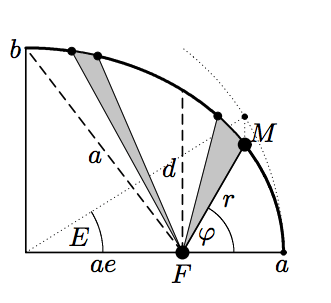


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

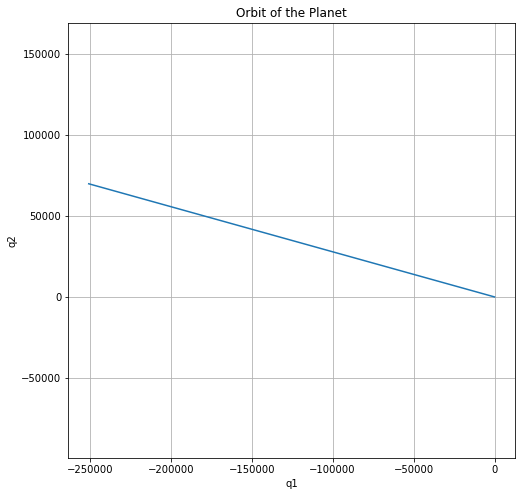

'--------------------Write your code above this line------------------------------'

In [14]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def f(q):
    q1, q2, p1, p2, = q
    r = (q1**2 + q2**2)**1.5
    q1_doudot = -q1/r
    q2_doudot = -q2/r
    q_dot = [p1, p2, q1_doudot, q2_doudot]
    return q_dot

e = 0.6
Tf = 200
dt = 1
steps = 40000

q1_0 = 1- e
q2_0 = 0
p1_0 = 0
p2_0 = ((1+e)/(1-e))**0.5

q = np.zeros((steps, 4))
q[0] = [q1_0, q2_0, p1_0, p2_0]

for i in range(1, steps):
    q_dot = f(q[i - 1])
    q[i] = q[i - 1] + dt * np.array(q_dot)
    
q1_ee = q[:,0]
q2_ee = q[:,1]

plt.figure(figsize=(8, 8))
plt.plot(q1_ee, q2_ee)
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('Orbit of the Planet')
plt.grid(True)
plt.axis('equal')
plt.show()


'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

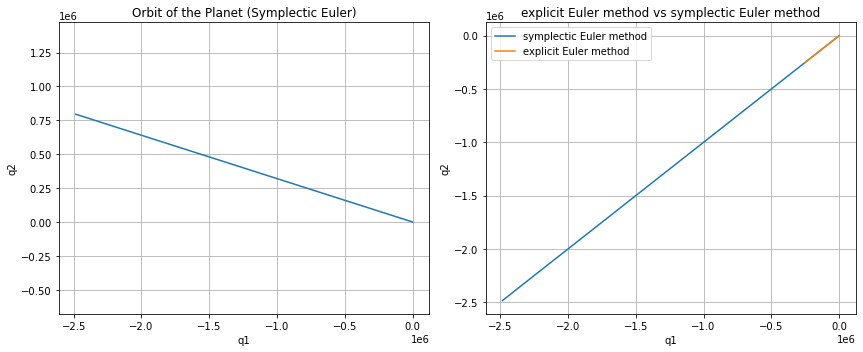

'--------------------Write your code above this line------------------------------'

In [19]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def Hamiltonian(p1, p2, q1, q2):
    r = (q1**2 + q2**2)**0.5
    return 0.5 * (p1**2 + p2**2) - 1.0 / r

def H_p1(p1, p2, q1, q2):
    return p1

def H_p2(p1, p2, q1, q2):
    return p2

def H_q1(p1, p2, q1, q2):
    r = (q1**2 + q2**2)**1.5
    return q1 / r

def H_q2(p1, p2, q1, q2):
    r = (q1**2 + q2**2)**1.5
    return q2 / r


e = 0.6
Tf = 200  
dt = 1  
num_steps = 400000

q1_0 = 1 - e
q2_0 = 0
p1_0 = 0
p2_0 = ((1 + e) / (1 - e))**0.5

q2_new = 1

q = np.zeros((num_steps, 2))
p = np.zeros((num_steps, 2))
H = np.zeros(num_steps)

q[0] = [q1_0, q2_0]
p[0] = [p1_0, p2_0]
H[0] = Hamiltonian(p1_0, p2_0, q1_0, q2_0)

for i in range(1, num_steps):
    p1_new = p[i - 1, 0] - dt * H_q1(p[i - 1, 0], p[i - 1, 1], q[i - 1, 0], q[i - 1, 1])
    q1_new = q[i - 1, 0] + dt * H_p1(p1_new, p[i - 1, 1], q[i - 1, 0], q[i - 1, 1])
    p2_new = p[i - 1, 1] - dt * H_q2(p[i - 1, 0], p[i - 1, 1], q[i - 1, 0], q[i - 1, 1])
    q2_new = q[i - 1, 1] + dt * H_p2(p1_new, p2_new, q1_new, q2_new)
    p[i] = [p1_new, p2_new]
    q[i] = [q1_new, q2_new]
    H[i] = Hamiltonian(p1_new, p2_new, q1_new, q2_new)

q1_se = q[:, 0]
q2_se = q[:, 1]


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(q1_se, q2_se)
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('Orbit of the Planet (Symplectic Euler)')
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.plot(q1_se, q1_se, label = 'symplectic Euler method')
plt.plot(q1_ee, q1_ee, label = 'explicit Euler method ')
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('explicit Euler method vs symplectic Euler method')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''